<a href="https://colab.research.google.com/github/PeterLee2314/Fruit-Spoilage-Detection-Application/blob/main/fruit_spoilage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model will be trained by Google Colab in this juypter notebook

In [1]:
import sys
import tensorflow as tf

print(sys.version)
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
setup = "clone"
#Environment Setup (clone)

!git clone https://github.com/PeterLee2314/Fruit-Spoilage-Detection-Application.git
!git clone https://github.com/PeterLee2314/Fruit-Spoilage-Detection-Dataset.git


#Environment setup (cloud)
from google.colab import drive
drive.mount('/content/drive/')


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.15.0
[]
Cloning into 'Fruit-Spoilage-Detection-Application'...
remote: Enumerating objects: 20502, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 20502 (delta 3), reused 19 (delta 2), pack-reused 20470
Receiving objects: 100% (20502/20502), 1.69 GiB | 29.06 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Cloning into 'Fruit-Spoilage-Detection-Dataset'...
remote: Enumerating objects: 20217, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 20217 (delta 0), reused 3 (delta 0), pack-reused 20214
Receiving objects: 100% (20217/20217), 1.68 GiB | 33.34 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (20383/20383), done.
Mounted at /content/drive/


In [2]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

# Define the source and destination directories
'''
source_dir = '/content/Fruit-Spoilage-Detection-Application/dataset/complete'
train_dir = '/content/Fruit-Spoilage-Detection-Application/dataset/train'
test_dir = '/content/Fruit-Spoilage-Detection-Application/dataset/test'
valid_dir = '/content/Fruit-Spoilage-Detection-Application/dataset/validation'
'''
source_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/complete'
train_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/train'
test_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/test'
valid_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/validation'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)


# source_directories = ['/content/Fruit-Spoilage-Detection-Application/dataset/complete']
source_directories = ['/content/Fruit-Spoilage-Detection-Dataset/dataset/complete']


#source_directories = ['/content/Fruit-Spoilage-Detection-Application/dataset/complete', '/content/drive/MyDrive/TensorFlow FYP/complete']
# Complete -> test/train/validation -> tmp -> test/train/validation (move[prevent repeated image])
subdirectories = ['bad_apple', 'bad_banana', 'bad_orange',
                  'good_apple', 'good_banana', 'good_orange']

#subdirectories = ['bad_apple', 'good_apple']

# Split ratios for train, test, and validation datasets (70% train, 20% test, 10% validation)
train_size = 0.7
test_size = 0.1
valid_size = 0.2

# Forced seeding
random.seed(42)
for source_dir in source_directories:
  for subdirectory in subdirectories:
      subdirectory_path = os.path.join(source_dir, subdirectory)
      sub_subdirectories = [name for name in os.listdir(subdirectory_path) if os.path.isdir(os.path.join(subdirectory_path, name))]

      train_subdirectory_dir = os.path.join(train_dir, subdirectory)
      test_subdirectory_dir = os.path.join(test_dir, subdirectory)
      valid_subdirectory_dir = os.path.join(valid_dir, subdirectory)

      os.makedirs(train_subdirectory_dir, exist_ok=True)
      os.makedirs(test_subdirectory_dir, exist_ok=True)
      os.makedirs(valid_subdirectory_dir, exist_ok=True)

      # (Optional Move/Copy) pattern + "/*/*" with glob.glob(pattern) for copy
      # for sub_subdirectory in sub_subdirectories:
      #   pattern = os.path.join(subdirectory_path,sub_subdirectory) + "/*/*"
      #   for img in glob.glob(pattern):
      #       shutil.copy(img, destination_path)

      for sub_subdirectory in sub_subdirectories:
          sub_subdirectory_path = os.path.join(subdirectory_path, sub_subdirectory)
          files = os.listdir(sub_subdirectory_path)
          print("sub_subdirectory_path",sub_subdirectory_path)
          # Split the files into train, test, and validation sets
          train_files, test_valid_files = train_test_split(files, test_size=(test_size + valid_size), random_state=42, shuffle=True)
          test_files, valid_files = train_test_split(test_valid_files, test_size=(valid_size / (test_size + valid_size)), random_state=42, shuffle=True)

          # Move all images inside train/test/validation folder
          for file in train_files:
              src = os.path.join(sub_subdirectory_path, file)
              dst = os.path.join(train_subdirectory_dir, file)
              shutil.move(src, dst)
              #shutil.copy(src, dst)

          for file in test_files:
              src = os.path.join(sub_subdirectory_path, file)
              dst = os.path.join(test_subdirectory_dir, file)
              shutil.move(src, dst)
              #shutil.copy(src, dst)

          for file in valid_files:
              src = os.path.join(sub_subdirectory_path, file)
              dst = os.path.join(valid_subdirectory_dir, file)
              shutil.move(src, dst)
              #shutil.copy(src, dst)
      #Print len for each subdirectories in train/test/validation folder
      train_count = len(os.listdir(train_subdirectory_dir))
      test_count = len(os.listdir(test_subdirectory_dir))
      valid_count = len(os.listdir(valid_subdirectory_dir))

      print(f"Number of files in {train_subdirectory_dir}: {train_count}")
      print(f"Number of files in {test_subdirectory_dir}: {test_count}")
      print(f"Number of files in {valid_subdirectory_dir}: {valid_count}")

sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple/bad_apple1
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple/bad_apple2
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple/bad_apple3
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/train/bad_apple: 2813
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/test/bad_apple: 401
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/validation/bad_apple: 807
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_banana/bad_banana2
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_banana/bad_banana1
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_banana/bad_banana3
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/train/bad_banana: 2186
Number of files

In [3]:
import os
import shutil

# Define the source and destination directories
temp_directory = '/content/tmp'

# Create the temp directory if it doesn't exist
os.makedirs(temp_directory, exist_ok=True)

# Move data from train_dir to temp_directory
train_fresh_dir = os.path.join(temp_directory, 'train', 'fresh')
train_spoiled_dir = os.path.join(temp_directory, 'train', 'spoiled')
os.makedirs(train_fresh_dir, exist_ok=True)
os.makedirs(train_spoiled_dir, exist_ok=True)

for subdirectory in os.listdir(train_dir):
    train_subdirectory_dir = os.path.join(train_dir, subdirectory)
    for file in os.listdir(train_subdirectory_dir):
        src = os.path.join(train_subdirectory_dir, file)
        dst = os.path.join(train_fresh_dir if 'good' in subdirectory else train_spoiled_dir, file)
        shutil.move(src, dst)

# Move data from test_dir to temp_directory
test_fresh_dir = os.path.join(temp_directory, 'test', 'fresh')
test_spoiled_dir = os.path.join(temp_directory, 'test', 'spoiled')
os.makedirs(test_fresh_dir, exist_ok=True)
os.makedirs(test_spoiled_dir, exist_ok=True)

for subdirectory in os.listdir(test_dir):
    test_subdirectory_dir = os.path.join(test_dir, subdirectory)
    for file in os.listdir(test_subdirectory_dir):
        src = os.path.join(test_subdirectory_dir, file)
        dst = os.path.join(test_fresh_dir if 'good' in subdirectory else test_spoiled_dir, file)
        shutil.move(src, dst)

# Move data from valid_dir to temp_directory
valid_fresh_dir = os.path.join(temp_directory, 'validation', 'fresh')
valid_spoiled_dir = os.path.join(temp_directory, 'validation', 'spoiled')
os.makedirs(valid_fresh_dir, exist_ok=True)
os.makedirs(valid_spoiled_dir, exist_ok=True)

for subdirectory in os.listdir(valid_dir):
    valid_subdirectory_dir = os.path.join(valid_dir, subdirectory)
    for file in os.listdir(valid_subdirectory_dir):
        src = os.path.join(valid_subdirectory_dir, file)
        dst = os.path.join(valid_fresh_dir if 'good' in subdirectory else valid_spoiled_dir, file)
        shutil.move(src, dst)

In [4]:
#Filtering Image(Non JPEG, PNG, GIF, or BMP)
from pathlib import Path
import imghdr

data_dir = temp_directory
image_extensions = [".png", ".jpg"]
del_oper = 0
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
            del_oper+=1
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)
            del_oper+=1
print("Total deletion:",del_oper)

Total deletion: 0


Found 14204 files belonging to 2 classes.
Found 4081 files belonging to 2 classes.


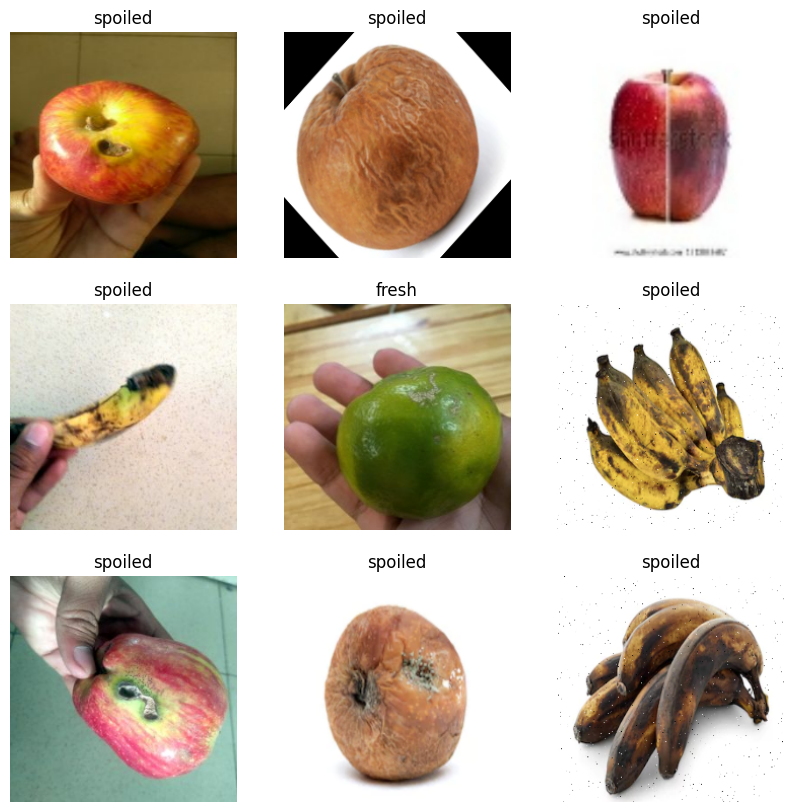

In [13]:
#Show Random Image
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential, load_model
from tensorflow import keras
from keras import Model
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from keras.applications import MobileNetV3Small
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import random
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from keras.layers import GlobalAveragePooling2D

BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_dir = temp_directory + '/train'
validation_dir = temp_directory + '/validation'
test_dir = temp_directory + '/test'


train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")






In [14]:
#Test set and validation set division
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Number of validation batches: 103
Number of test batches: 25


In [15]:
from keras import layers

# Add MobileNetV3Small as the base model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Pure 2 class classification
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.CenterCrop(height=224, width=224),
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
##x = layers.Flatten()(base_model.output)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
##x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(train_dataset,
          epochs=10,
          validation_data=validation_dataset)
model.save('fruit_spoilage_detection_model.keras')

Epoch 1/10
444/444 [==============================] - 283s 623ms/step - loss: 0.2661 - accuracy: 0.8936 - val_loss: 0.1801 - val_accuracy: 0.9317
Epoch 2/10
444/444 [==============================] - 285s 640ms/step - loss: 0.1679 - accuracy: 0.9381 - val_loss: 0.1542 - val_accuracy: 0.9415
Epoch 3/10
444/444 [==============================] - 278s 624ms/step - loss: 0.1459 - accuracy: 0.9460 - val_loss: 0.1414 - val_accuracy: 0.9497
Epoch 4/10
444/444 [==============================] - 282s 634ms/step - loss: 0.1375 - accuracy: 0.9495 - val_loss: 0.1318 - val_accuracy: 0.9509
Epoch 5/10
444/444 [==============================] - 272s 612ms/step - loss: 0.1311 - accuracy: 0.9525 - val_loss: 0.1315 - val_accuracy: 0.9497
Epoch 6/10
444/444 [==============================] - 277s 623ms/step - loss: 0.1230 - accuracy: 0.9542 - val_loss: 0.1210 - val_accuracy: 0.9543
Epoch 7/10
444/444 [==============================] - 280s 629ms/step - loss: 0.1224 - accuracy: 0.9540 - val_loss: 0.1177 -